# Data Visualization

# 1. Bar Charts and Histograms

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel("Hospital Readmission Data.xlsx")
df.head()

,PatientID,Age (in years),Gender,AdmissionType,Diagnosis,LengthOfStay (in days),TreatmentReceived,FollowUpSchedule,Readmitted
0,1,65,Male,Emergency,Heart Failure,7,Medication A,Yes,Yes
1,2,50,Female,Elective,Hip Replacement,5,Surgery,Yes,No
2,3,72,Male,Emergency,Pneumonia,10,Antibiotics,No,Yes
3,4,45,Female,Urgent,Appendicitis,3,Surgery,Yes,No
4,5,80,Female,Emergency,Stroke,12,Rehabilitation,Yes,Yes


([0, 1, 2],
 [Text(0, 0, 'Emergency'), Text(1, 0, 'Elective'), Text(2, 0, 'Urgent')])

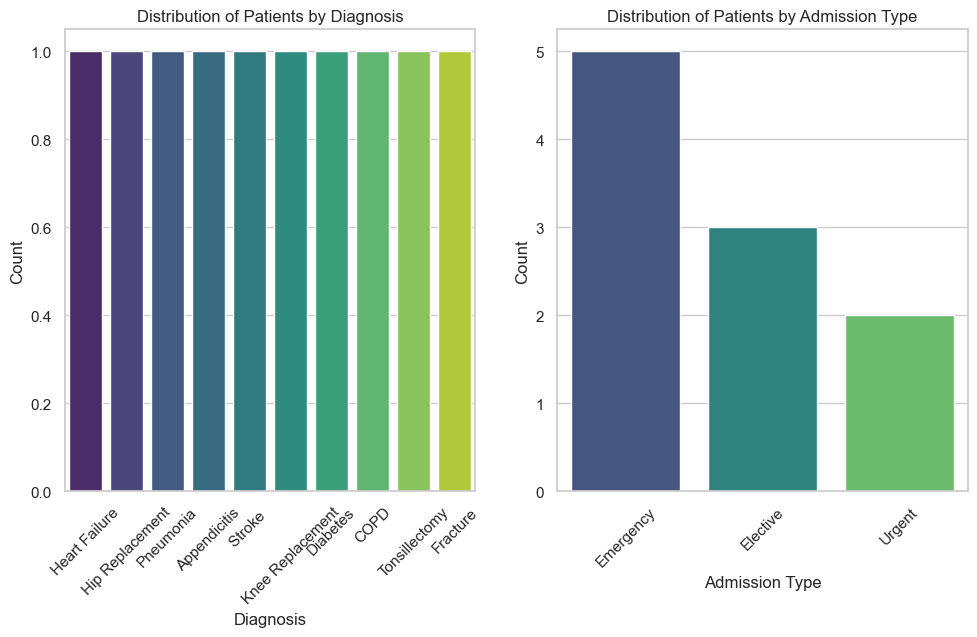

In [18]:
# 1). Create bar charts to show the distribution of patients by Diagnosis, AdmissionType, and TreatmentReceived. 
# Set the plot style
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(18, 6))

# Bar chart for Diagnosis
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Diagnosis',palette='viridis')
plt.title('Distribution of Patients by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45) 

# Bar chart for AdmissionType
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='AdmissionType',palette='viridis')
plt.title('Distribution of Patients by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 


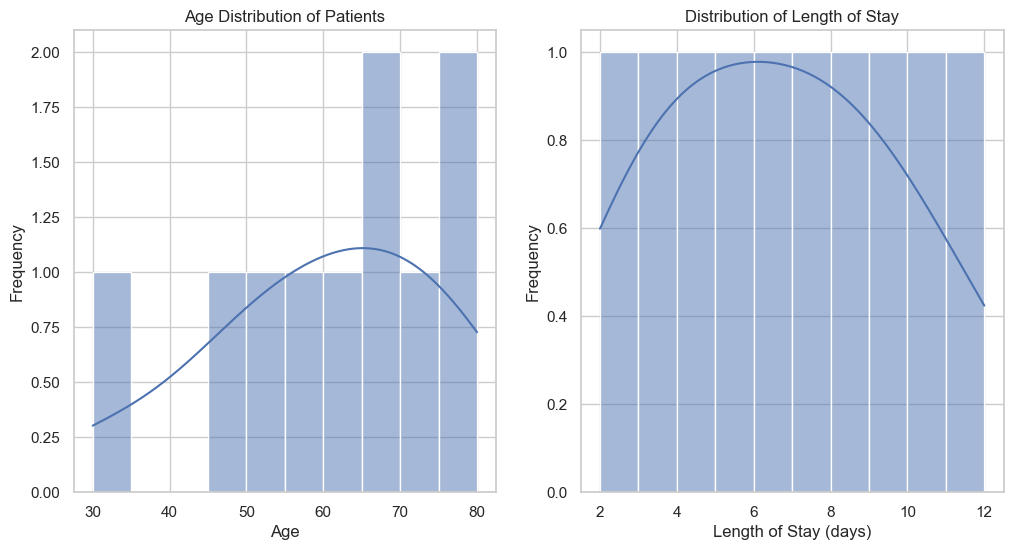

In [36]:
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age (in years)'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for LengthOfStay
plt.subplot(1, 2, 2)
sns.histplot(df['LengthOfStay (in days)'], bins=10, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# 2. Pie Charts

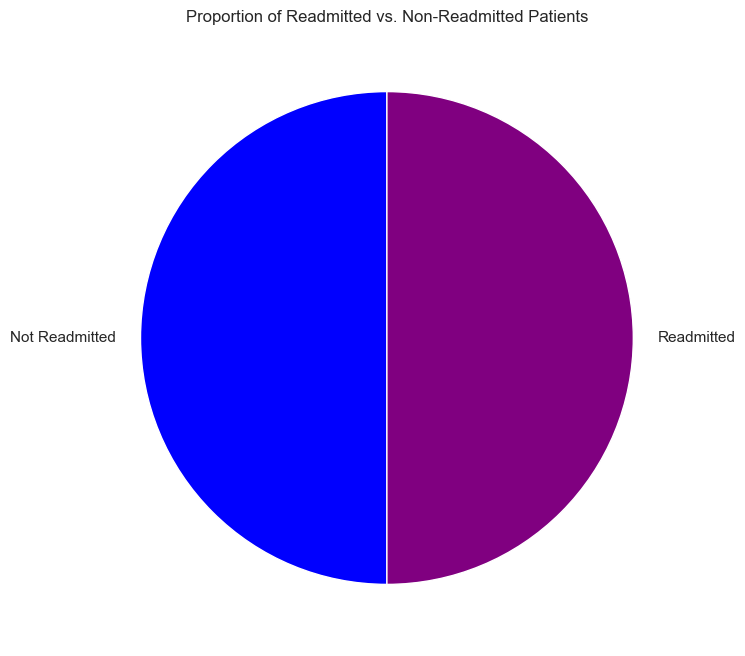

In [32]:
# Create pie chart for readmission proportion

readmission_counts = df['Readmitted'].value_counts()
labels = ['Not Readmitted', 'Readmitted']

plt.figure(figsize=(8, 8))
plt.pie(readmission_counts, labels=labels,startangle=90, colors=['blue', 'purple'])
plt.title('Proportion of Readmitted vs. Non-Readmitted Patients')
plt.show()

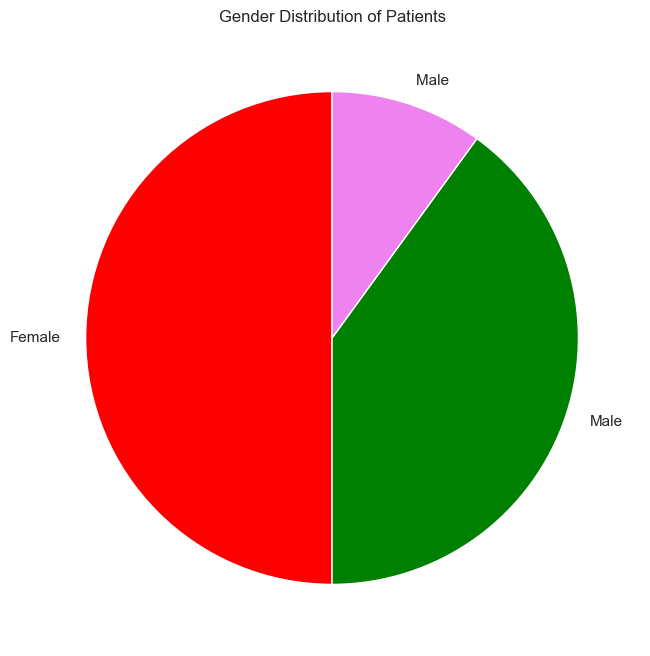

In [34]:
# Create pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, startangle=90, colors=['red', 'green','violet'])
plt.title('Gender Distribution of Patients')
plt.show()

# 3). Box Plots

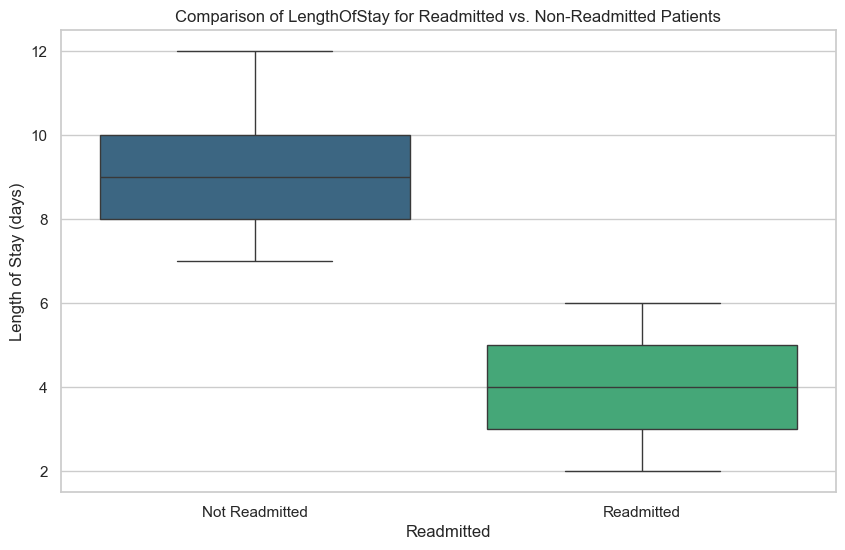

In [39]:
# Create box plot for LengthOfStay by Readmitted status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Readmitted', y='LengthOfStay (in days)', data=df, palette='viridis')
plt.title('Comparison of LengthOfStay for Readmitted vs. Non-Readmitted Patients')
plt.xlabel('Readmitted')
plt.ylabel('Length of Stay (days)')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()

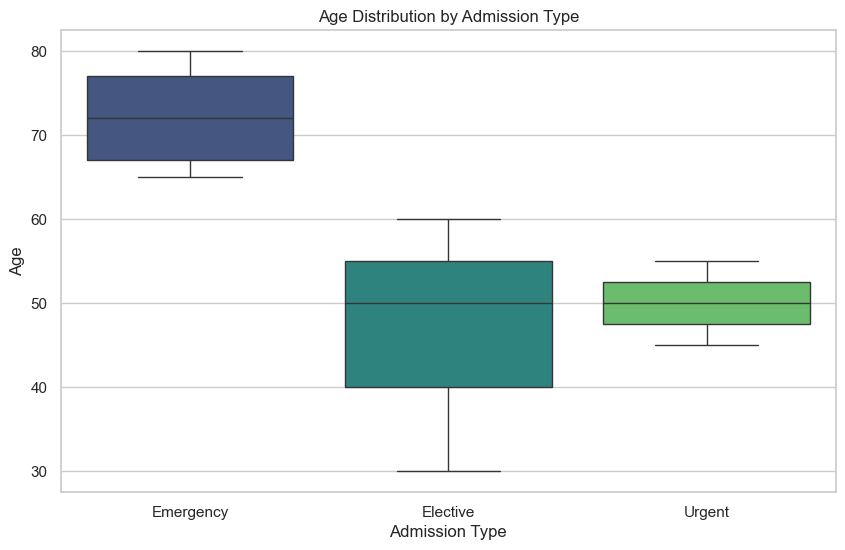

In [40]:
# Create box plot for Age by AdmissionType
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdmissionType', y='Age (in years)', data=df, palette='viridis')
plt.title('Age Distribution by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Age')
plt.show()

# 4. Heatmaps

In [43]:
# Apply Label hot encoding on a data set
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Gender', 'AdmissionType', 'Diagnosis', 'TreatmentReceived', 'FollowUpSchedule', 'Readmitted' ]
# Apply Label encoding to each categorical column
for columns in categorical_columns:
    df[columns] = le.fit_transform(df[columns])

In [44]:
df.head()

,PatientID,Age (in years),Gender,AdmissionType,Diagnosis,LengthOfStay (in days),TreatmentReceived,FollowUpSchedule,Readmitted
0,1,65,1,1,4,7,3,1,1
1,2,50,0,0,5,5,6,1,0
2,3,72,1,1,7,10,0,0,1
3,4,45,0,2,0,3,6,1,0
4,5,80,0,1,8,12,5,1,1


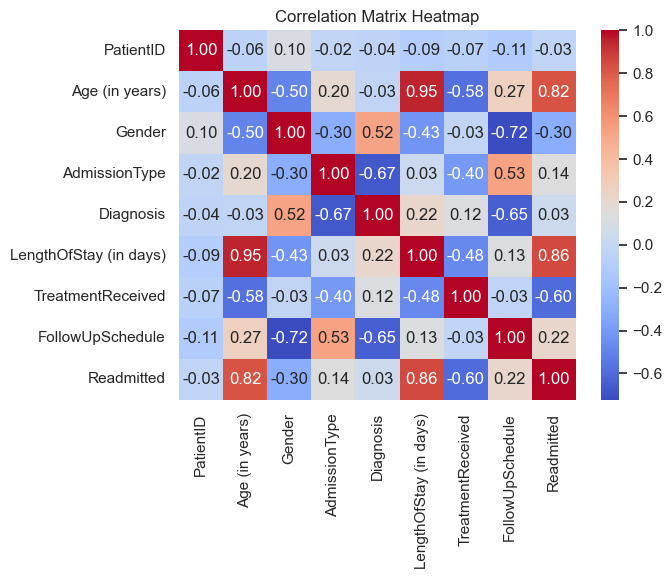

In [49]:
# Calculate correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,fmt='.2f', cmap='coolwarm',)
plt.title('Correlation Matrix Heatmap')
plt.show()

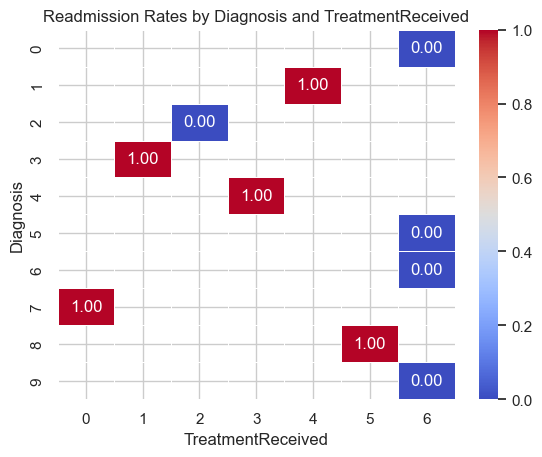

In [51]:
# Draw the heatmap with the readmission rates
readmission_rates = df.groupby(['Diagnosis', 'TreatmentReceived'])['Readmitted'].mean().unstack()
sns.heatmap(readmission_rates, annot=True, fmt='.2f', cmap='coolwarm', vmin=0, vmax=1, linewidths=.5)
plt.title('Readmission Rates by Diagnosis and TreatmentReceived')
plt.ylabel('Diagnosis')
plt.xlabel('TreatmentReceived')
plt.show()

# Scatter plots

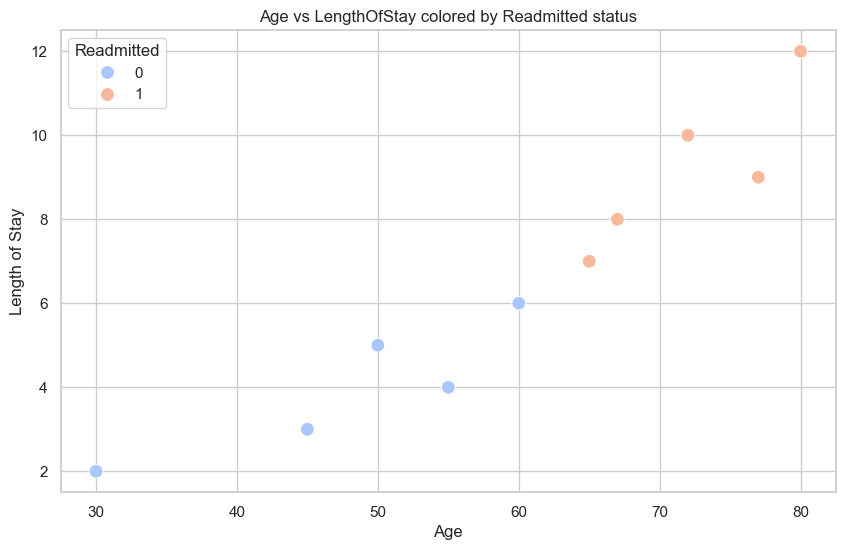

In [55]:
# Plot Age against LengthOfStay, colored by Readmitted status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age (in years)', y='LengthOfStay (in days)', hue='Readmitted', palette='coolwarm', s=100)
plt.title('Age vs LengthOfStay colored by Readmitted status')
plt.xlabel('Age')
plt.ylabel('Length of Stay')
plt.legend(title='Readmitted')
plt.show()

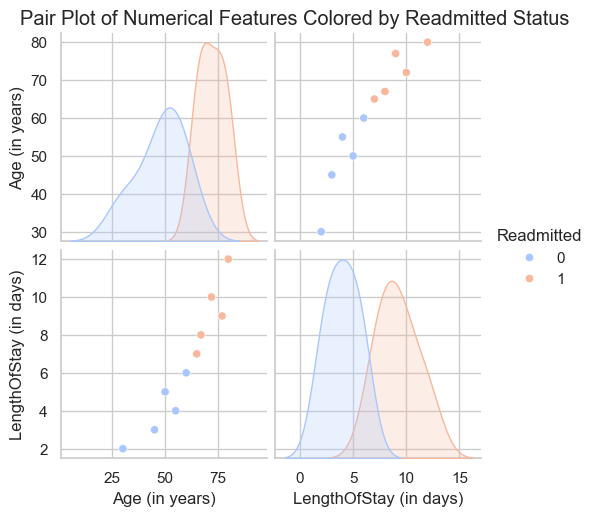

In [62]:
# Select only the numerical features for the pair plot
numerical_features = df[['Age (in years)', 'LengthOfStay (in days)']]

# Add the 'Readmitted' column to the numerical features for hue
numerical_features['Readmitted'] = df['Readmitted']

# Create the pair plot
sns.pairplot(numerical_features, hue='Readmitted', palette='coolwarm')
plt.suptitle('Pair Plot of Numerical Features Colored by Readmitted Status', y=1.02)
plt.show()